### EN2550: Object Counting on a Conveyor Belt

Index No : 190562G

Name : S. Sanjith

Github : https://github.com/sanjith1999/EN2550-Assignments/tree/master/Object%20Counting%20on%20a%20Conveyor%20Belt

In [2]:
# Importing necessary files
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import sys

lib_dir="E:\Coding\Computer Vision\cv-libs"

# Importing Custom Functions
sys.path.append(lib_dir)
from show_images import show_images

**Connected Component Analysis**

*In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).*

*Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.*

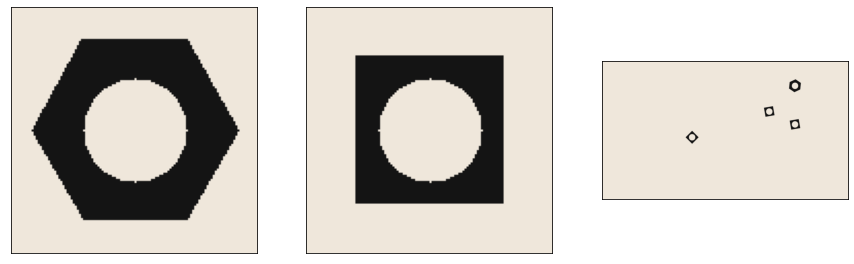

In [5]:
hexnut_template = cv.imread('./images/hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('./images/squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('./images/conveyor_f100.png', cv.IMREAD_COLOR)

show_images([[hexnut_template,'c'],[squarenut_template,'c'],[conveyor_f100,'c']])

*Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images.*

In [6]:
# convert to grayscale
hexnut_template=cv.cvtColor(hexnut_template,cv.COLOR_BGR2GRAY)
squarenut_template=cv.cvtColor(squarenut_template,cv.COLOR_BGR2GRAY)
conveyor_f100=cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)

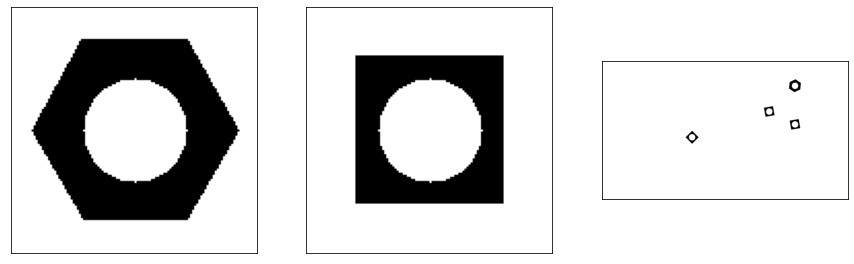

(20.0, 20.0, 20.0)

In [14]:
# Thresholding
hexanut_ret,hexanut_th = cv.threshold(hexnut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
squarenut_ret,squarenut_th = cv.threshold(squarenut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
conveyor_ret,conveyor_th = cv.threshold(conveyor_f100,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

show_images([[hexanut_th,'g'],[squarenut_th,'g'],[conveyor_th,'g']])
hexanut_ret,squarenut_ret,conveyor_ret

*Threshold Value* $=20.0$

*Carry out morphological closing to remove small holes inside the foreground. Use a 3x3
kernel. See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide.*

Inorder to do closing on the foreground it is important to keep the foreground white and background black... Instead we can do opening on the non-inverted image

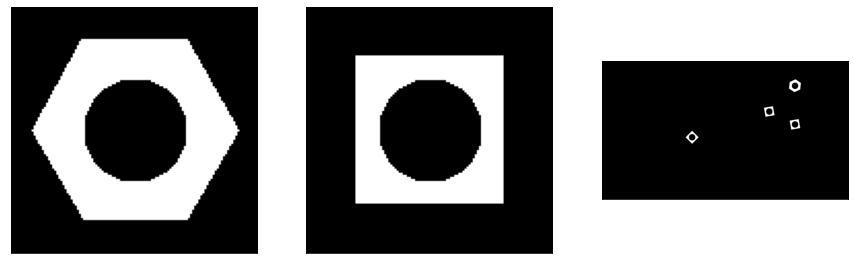

In [73]:
kernel = np.ones((3,3),np.uint8)
hexanut_cl = cv.morphologyEx(hexanut_th, cv.MORPH_OPEN, kernel)
squarenut_cl = cv.morphologyEx(squarenut_th, cv.MORPH_OPEN, kernel)
conveyor_cl = cv.morphologyEx(conveyor_th, cv.MORPH_OPEN, kernel)

#Inverting the images for further operation
hexanut_cl = np.bitwise_not(hexanut_cl)
squarenut_cl = np.bitwise_not(squarenut_cl)
conveyor_cl = np.bitwise_not(conveyor_cl)

show_images([[hexanut_cl,'g'],[squarenut_cl,'g'],[conveyor_cl,'g']])

*Connected components analysis: apply the connectedComponentsWithStats function (see https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f) and display the outputs as colormapped images. 
Answer the following questions*

+ How many connected components are detected in each image?
+ What are the statistics? Interpret these statistics.
+ What are the centroids?

*For the hexnut template, you should get the object area in pixel as approximately 4728.*

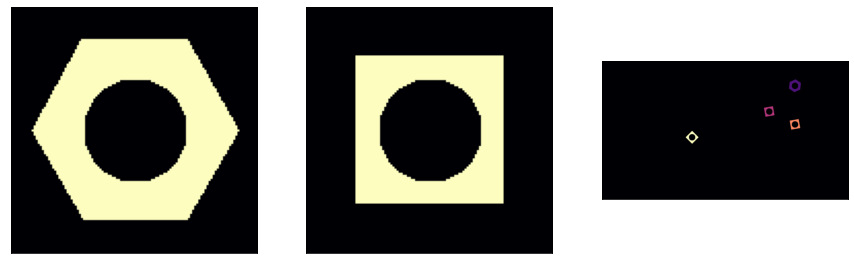

Number of connected components detected in each image 
------------------------------------------------------------------------------------------------------
Image 1 : 2
Image 2 : 2
Image 3 : 5
Here background is also considered as a connected component... So, without background each image have 1, 1, and 4 connected components respectively.

Intepretation of Statistics
------------------------------------------------------------------------------------------------------
Format : [The Leftmost(x), The Topmost(y), The Horizontal size of Bounding box, The Vertical size of Bounding Box, Total Area of Connected Component]
Image 1 : [  10   16  101   88 4728]
Image 2 : [  24   24   72   72 3227]
Image 3 : [1454  150   92  100 4636] ,  [1259  359   82   82 3087] ,  [1459  459   82   82 3087] ,  [ 650  550  101  101 3144]

Centroids
------------------------------------------------------------------------------------------------------
Image 1 : [59.83375635 59.22356176]
Image 2 : [59.19677719 5

In [58]:
hexanut_N,hexanut_labels,hexanut_stats,hexanut_cent=cv.connectedComponentsWithStats(hexanut_cl)
squarenut_N,squarenut_labels,squarenut_stats,squarenut_cent=cv.connectedComponentsWithStats(squarenut_cl)
conveyor_N,conveyor_labels,conveyor_stats,conveyor_cent=cv.connectedComponentsWithStats(conveyor_cl)

hexanuts=np.uint8(hexanut_labels*255/hexanut_labels.max())
squarenuts=np.uint8(squarenut_labels*255/squarenut_labels.max())
conveyor=np.uint8(conveyor_labels*255/conveyor_labels.max())

hexanuts=cv.applyColorMap(hexanuts,cv.COLORMAP_MAGMA)
squarenuts=cv.applyColorMap(squarenuts,cv.COLORMAP_MAGMA)
conveyor=cv.applyColorMap(conveyor,cv.COLORMAP_MAGMA)

show_images([[hexanuts,'c'],[squarenuts,'c'],[conveyor,'c']])

print('Number of connected components detected in each image \n------------------------------------------------------------------------------------------------------')
print("Image 1 :",hexanut_N)
print("Image 2 :",squarenut_N)
print("Image 3 :",conveyor_N)
print ("Here background is also considered as a connected component... So, without background each image have 1, 1, and 4 connected components respectively.")
print("\nIntepretation of Statistics\n------------------------------------------------------------------------------------------------------")
print("Format : [The Leftmost(x), The Topmost(y), The Horizontal size of Bounding box, The Vertical size of Bounding Box, Total Area of Connected Component]")
print("Image 1 :",hexanut_stats[1])
print("Image 2 :",squarenut_stats[1])
print("Image 3 :",conveyor_stats[1],", ",conveyor_stats[2],", ",conveyor_stats[3],", ",conveyor_stats[4])
print("\nCentroids\n------------------------------------------------------------------------------------------------------")
print("Image 1 :",hexanut_cent[1])
print("Image 2 :",squarenut_cent[1])
print("Image 3 :",conveyor_cent[1],", ",conveyor_cent[2],", ",conveyor_cent[3],", ",conveyor_cent[4])

*Contour analysis: Use findContours function to retrieve the extreme outer contours. (see https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html for help and https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0 for information.*

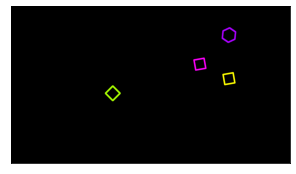

In [99]:
conveyor_img=np.zeros((*conveyor_cl.shape,3),dtype=np.uint8)
conveyor_contours, conveyor_hierarchy = cv.findContours(conveyor_cl, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)


for i in range( len(conveyor_contours)):
    conveyor_img = cv.drawContours(conveyor_img, conveyor_contours, i,(np.random.randint(22)*10,255,255) , 9)
show_images([[conveyor_img,[cv.COLOR_HSV2RGB]]])

***Detecting Objects on a Synthetic Conveyor***

*In this section, we will use the synthetic conveyor.mp4 sequence to count the two types of nuts.*
*Open the sequence and play it using the code below.*

In [ ]:
cv.namedWindow('Conveyor',cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(2) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

*Count the number of matching hexagonal nuts in conveyor_f100.png. You can use matchCountours function as shown in https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html to match contours in each frame with that in th template.*

*Count the number of objects that were conveyed along the conveyor belt: Display the count in the current frame and total count upto the current frame in the output video. Please compress your video (using Handbreak or otherwise) before uploading. It would be good to experiment first with the two adjacent frames [conveyor_f100.png]() and [conveyor_f101.png](). In order to disregard partially appearing nuts, consider comparing the contour area in addition to using the [matchCountours]() function.*

In [ ]:
#Your Code Goes Here

# Writing the Video
frame_array=[]
shape=(1080,1920,3)

#Your Code Goes Here



out = cv.VideoWriter('./conveyor_result_190018V.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()